In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import re

In [3]:
tweets = pd.read_csv('train.csv')
new_column_name = {"target":"veracity"}
tweets = tweets.rename(columns = new_column_name)

In [4]:
#tweets['veracity'] = tweets['veracity'].replace({0: 'Not Real', 1: 'Real'})
tweets['length']=tweets['text'].str.len()
tweets.head()

,id,keyword,location,text,veracity,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [5]:
tweets_grouped = tweets.groupby('veracity')
tweets_fake = tweets_grouped.get_group(0)
tweets_real = tweets_grouped.get_group(1)

In [6]:
#Nos fijamos cuantos tweets son verdaderos y cuantos falsos 

tweets_grouped['id'].count()


veracity
0    4342
1    3271
Name: id, dtype: int64

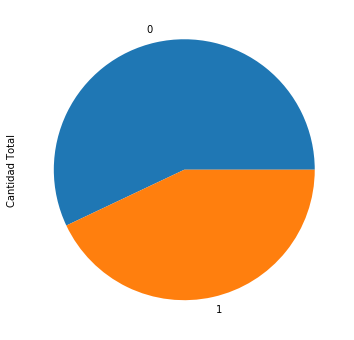

In [7]:
#Graficamos para ver la distribucion de tweets reales contra falsos 
tweets_grouped = tweets_grouped.agg({'veracity':'count'})
tweets_grouped.columns = ['Cantidad Total']

tweets_grouped['Cantidad Total'].plot.pie(figsize=(10, 6))

In [8]:
bins=range(0,160,10)

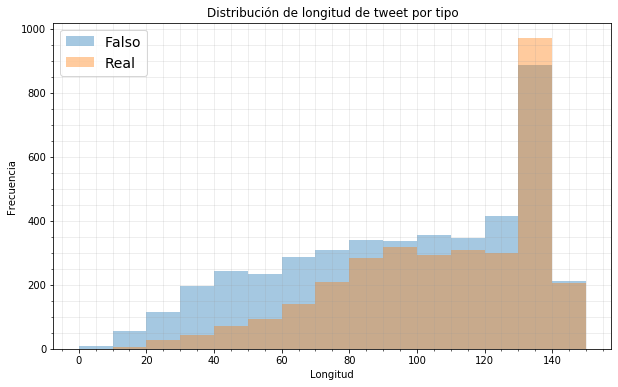

In [9]:
fig = plt.gcf()
fig.set_size_inches(10, 6)

sns.distplot(tweets_fake['length'],  kde=False, label='Falso', bins=bins)
sns.distplot(tweets_real['length'],  kde=False,label='Real', bins=bins)

plt.legend(prop={'size': 14})
plt.title('Distribución de longitud de tweet por tipo')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')

plt.minorticks_on()
plt.grid(which='both', color='#999999', linestyle='-', alpha=0.2)
#plt.show()
plt.savefig('Histogram length by type')

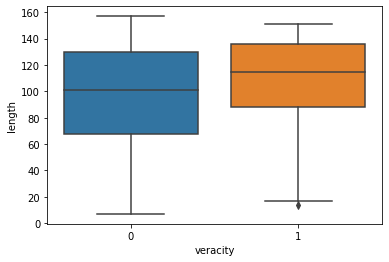

In [10]:
ax = sns.boxplot(x="veracity", y="length", data=tweets)

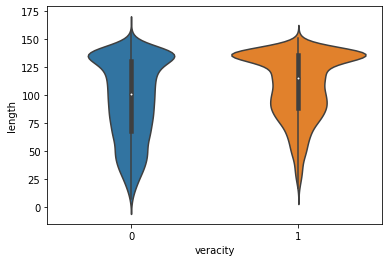

In [11]:
ax = sns.violinplot(x="veracity", y="length", data=tweets)

**Keyword**

In [12]:
tweets['keyword'] = tweets['keyword'].str.replace('%20', ' ')

In [13]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   veracity  7613 non-null   int64 
 5   length    7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


In [14]:
grouped_by_keyword = tweets.groupby('keyword').agg({'veracity':'mean','length':'mean'}).reset_index()
grouped_by_keyword.columns=['keyword','veracity_mean','length_mean']
grouped_by_keyword

,keyword,veracity_mean,length_mean
0,ablaze,0.361111,94.694444
1,accident,0.685714,100.085714
2,aftershock,0.000000,101.205882
3,airplane accident,0.857143,106.400000
4,ambulance,0.526316,98.394737
...,...,...,...
216,wounded,0.702703,111.054054
217,wounds,0.303030,103.363636
218,wreck,0.189189,88.540541
219,wreckage,1.000000,122.256410


In [15]:
grouped_by_keyword.sort_values(['veracity_mean'],ascending=False)

,keyword,veracity_mean,length_mean
62,debris,1.000000,107.594595
219,wreckage,1.000000,122.256410
70,derailment,1.000000,109.794872
153,outbreak,0.975000,128.925000
152,oil spill,0.973684,102.973684
...,...,...,...
27,body bag,0.030303,125.393939
19,blazing,0.029412,96.382353
170,ruin,0.027027,75.459459
29,body bags,0.024390,100.780488


In [16]:
grouped_by_keyword.sort_values(['length_mean'],ascending=False)

,keyword,veracity_mean,length_mean
166,rescuers,0.914286,129.342857
153,outbreak,0.975000,128.925000
79,devastation,0.750000,125.722222
27,body bag,0.030303,125.393939
92,emergency services,0.333333,125.363636
...,...,...,...
23,blizzard,0.108108,71.891892
180,smoke,0.088235,70.882353
173,screaming,0.055556,70.472222
174,screams,0.142857,70.428571


In [17]:
#Barplot por mayor y por menor 

**Wordcloud**

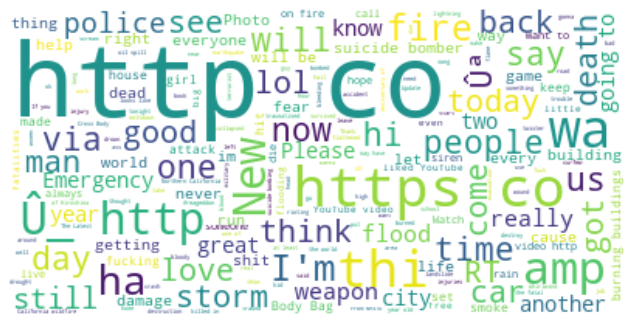

In [18]:
wordcloud = WordCloud(background_color="white").generate(' '.join(tweets['text']))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
#Hay muchas url

In [20]:
tweets[tweets['text'].str.contains(pat = 'http')]

,id,keyword,location,text,veracity,length
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,55
...,...,...,...,...,...,...
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,121
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1,134
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65


In [21]:
#data['text_no_url'] = data['text'].str.replace(r'http\S+', '', regex=True)

In [22]:
tweets['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

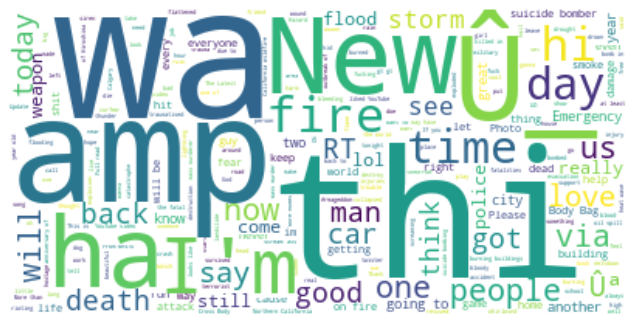

In [23]:
#Wordcloud
wordcloud = WordCloud(background_color="white",max_words = 400).generate(' '.join(tweets['text'].replace(r'http\S+', ' ', regex=True)))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()                 

In [24]:
#thi? amp? Û?

In [25]:
#Data real

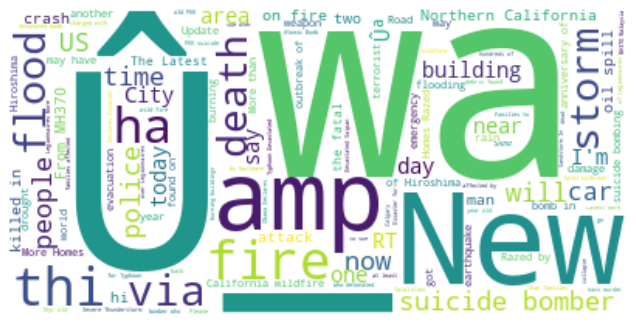

In [26]:
#Wordcloud
wordcloud = WordCloud(background_color="white").generate(' '.join(tweets_real['text'].replace(r'http\S+', ' ', regex=True)))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()  

In [27]:
#Data falsa

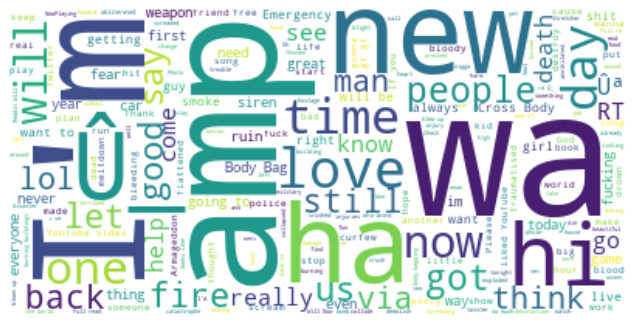

In [28]:
#Wordcloud
wordcloud = WordCloud(background_color="white",max_words = 2500).generate(' '.join(tweets_fake['text'].replace(r'http\S+', ' ', regex=True)))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()  

In [29]:
tweets[tweets['text'].str.contains('Û')]['text'].to_list()

['Barbados #Bridgetown JAMAICA \x89ÛÒ Two cars set ablaze: SANTA CRUZ \x89ÛÓ Head of the St Elizabeth Police Superintende...  http://t.co/wDUEaj8Q4J',
 'SANTA CRUZ \x89ÛÓ Head of the St Elizabeth Police Superintendent Lanford Salmon has r ... - http://t.co/vplR5Hka2u http://t.co/SxHW2TNNLf',
 'Set our hearts ablaze and every city was a gift And every skyline was like a kiss upon the lips @\x89Û_ https://t.co/cYoMPZ1A0Z',
 '#stlouis #caraccidentlawyer Speeding Among Top Causes of Teen Accidents https://t.co/k4zoMOF319 https://t.co/S2kXVM0cBA Car Accident tee\x89Û_',
 'RT nAAYf: First accident in years. Turning onto Chandanee Magu from near MMA. Taxi rammed into me while I was halfway turned. Everyone conf\x89Û_',
 '320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yNXnvVKCDA | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #Ices\x89Û_ http://t.co/weQPesENku',
 '320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #Ices\x89Û_ http://t.co

In [30]:
#Limpiar texto. Eliminar \x89Û

In [31]:
tweets_by_location = tweets.groupby('location')

In [32]:
real_tweets = tweets['veracity'] == 1
fake_tweets = tweets['veracity'] == 0

In [33]:
real_tweets_by_location = tweets[tweets_real].groupby('location')


ValueError: Boolean array expected for the condition, not object

In [ ]:
tweets_real_by_location.tail(20)

In [ ]:
# Analizamos que datos de los tweets podemos obtener a partir de su Location 
tweets['location'].describe()

In [34]:
# Cuales locaciones tienen por lo menos mas de 30 tweets
tweets['location'].value_counts() > 30

USA                       True
New York                  True
United States             True
London                    True
Canada                   False
                         ...  
nc                       False
Phoenix, Arizona, USA    False
Kirkwall                 False
St Joseph de Beauce      False
they/them                False
Name: location, Length: 3341, dtype: bool

In [35]:
#tweets['location'].fillna('Uncertain', inplace = True) 
tweets_by_location = tweets['location'].value_counts().sort_values(ascending=False)

Text(0.5, 1.0, 'Tweets´ most common locations')

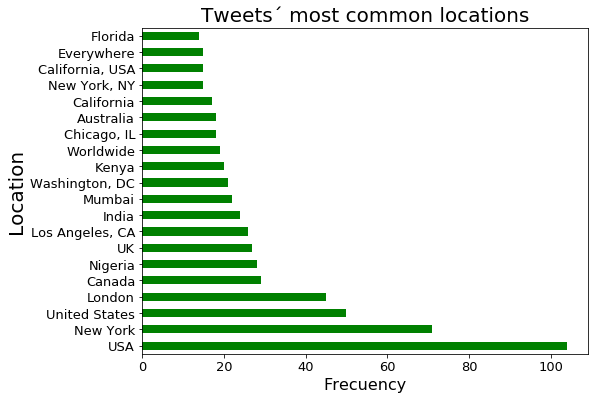

In [36]:
tweets_by_location.iloc[0:20].plot(kind = 'barh',figsize = (8,6), color = 'green', fontsize = 13)
plt.xlabel('Frecuency',fontsize = 16)
plt.ylabel('Location', fontsize = 20)
plt.title('Tweets´ most common locations',fontsize  = 20)

Text(0.5, 1.0, 'Tweets´ most uncommon locations')

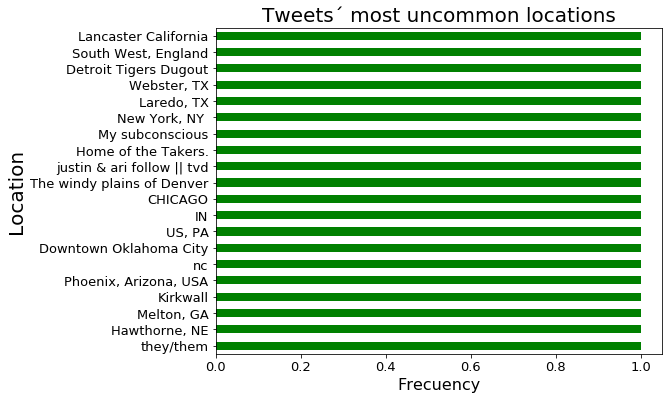

In [37]:
tweets_by_location.sort_values(ascending=True).iloc[0:20].plot(kind = 'barh',figsize = (8,6), color = 'green', fontsize = 13)
plt.xlabel('Frecuency',fontsize = 16)
plt.ylabel('Location', fontsize = 20)
plt.title('Tweets´ most uncommon locations',fontsize  = 20)

In [38]:
real_tweets_by_location = tweets[real_tweets]['location'].value_counts().sort_values(ascending=False)
real_tweets_by_location

USA                           67
United States                 27
Nigeria                       22
India                         20
Mumbai                        19
                              ..
they/them                      1
KÌ¦ln, Nordrhein-Westfalen     1
ÌÏT: 40.562796,-75.488849      1
... -.- -.--                   1
Medford, NJ                    1
Name: location, Length: 1513, dtype: int64

Text(0.5, 1.0, 'Real Tweets´ most common locations')

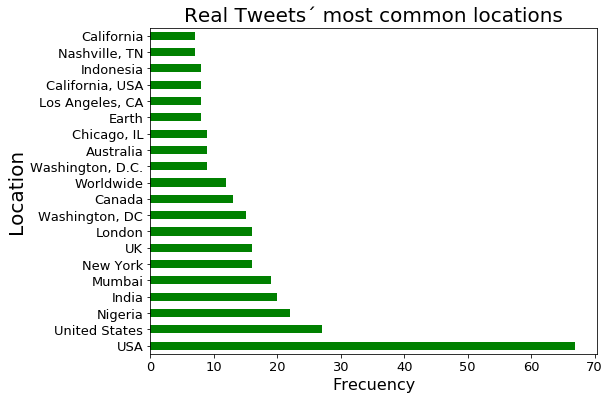

In [39]:
real_tweets_by_location.iloc[0:20].plot(kind = 'barh',figsize = (8,6), color = 'green', fontsize = 13)
plt.xlabel('Frecuency',fontsize = 16)
plt.ylabel('Location', fontsize = 20)
plt.title('Real Tweets´ most common locations',fontsize  = 20)

In [40]:
fake_tweets_by_location = tweets[fake_tweets]['location'].value_counts().sort_values(ascending=False)
fake_tweets_by_location

New York              55
USA                   37
London                29
United States         23
Los Angeles, CA       18
                      ..
Hendersonville, NC     1
Merica!                1
Aurora, Ontario        1
Regalo Island          1
Sochi, KDA, RU         1
Name: location, Length: 2142, dtype: int64

Text(0.5, 1.0, 'Fake Tweets´ most common locations')

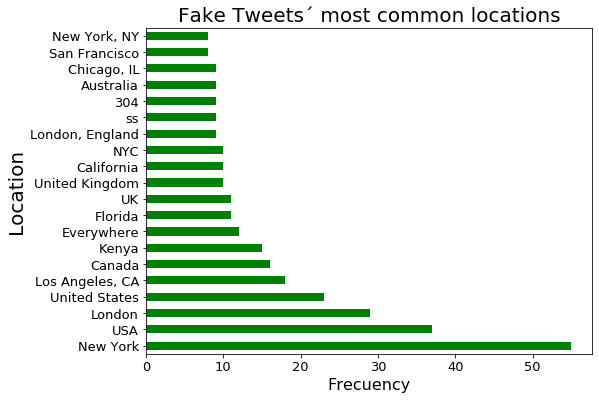

In [41]:
fake_tweets_by_location.iloc[0:20].plot(kind = 'barh',figsize = (8,6), color = 'green', fontsize = 13)
plt.xlabel('Frecuency',fontsize = 16)
plt.ylabel('Location', fontsize = 20)
plt.title('Fake Tweets´ most common locations',fontsize  = 20)

In [50]:
tweets_by_loc = tweets.groupby('location').agg({'veracity':['sum','count','mean']})
tweets_by_loc.columns = ['veracity_sum','veracity_count','veracity_mean']
tweets_by_loc.sort_values(by='veracity_sum',ascending=False)

tweets_by_loc = tweets_by_loc.drop(tweets_by_loc[tweets_by_loc['veracity_count'] < 10].index)
tweets_by_loc.sort_values(by='veracity_sum',ascending=False)

,veracity_sum,veracity_count,veracity_mean
location,,,
USA,67,104,0.644231
United States,27,50,0.540000
Nigeria,22,28,0.785714
India,20,24,0.833333
Mumbai,19,22,0.863636
UK,16,27,0.592593
New York,16,71,0.225352
London,16,45,0.355556
"Washington, DC",15,21,0.714286


Text(0.5, 1.0, 'Most real tweets percentege by location')

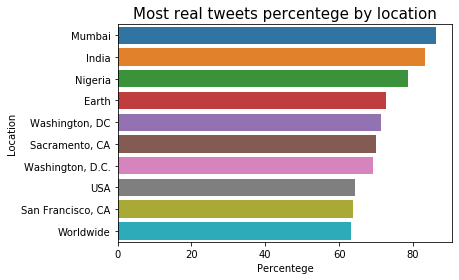

In [54]:
ax = sns.barplot(x=tweets_by_loc['veracity_mean'].nlargest(10) * 100,y=tweets_by_loc['veracity_mean'].nlargest(10).index,orient='h')
ax.set_xlabel("Percentege")
ax.set_ylabel("Location")
ax.set_title("Most real tweets percentege by location", fontsize = 15)

Text(0.5, 1.0, 'Less real tweets percentege by location')

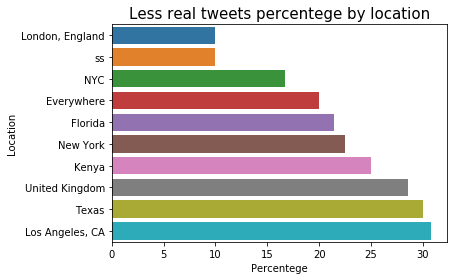

In [53]:
ax = sns.barplot(x=tweets_by_loc['veracity_mean'].nsmallest(10) * 100,y= tweets_by_loc['veracity_mean'].nsmallest(10).index,orient='h')
ax.set_xlabel("Percentege")
ax.set_ylabel("Location")
ax.set_title("Less real tweets percentege by location", fontsize = 15)

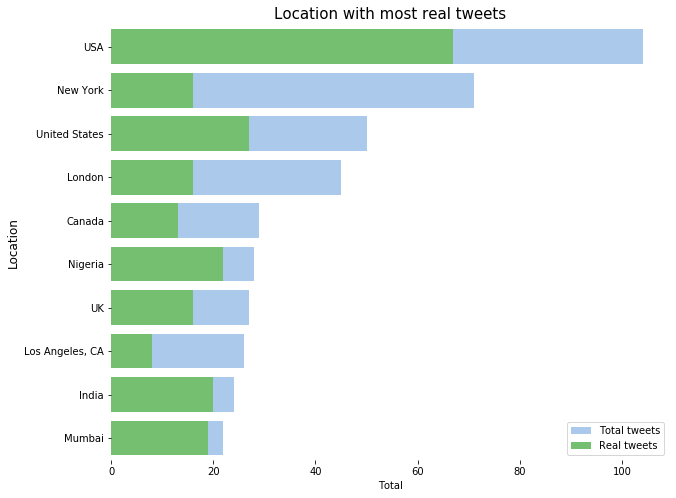

In [92]:
locations_most_tweets = tweets_by_loc['veracity_count'].nlargest(10).index

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=tweets_by_loc.loc[locations_most_tweets,'veracity_count'], y=locations_most_tweets, color="b",label="Total tweets")
sns.set_color_codes("muted")
sns.barplot(x=tweets_by_loc.loc[index_most_tweeted,'veracity_sum'], y=locations_most_tweets, color="g",label="Real tweets")
sns.set_color_codes("pastel")


ax.set_title("Location with most real tweets", fontsize = 15)
ax.set_ylabel("Location", fontsize = 12)
ax.legend(loc="lower right")
ax.set(ylabel="Location",xlabel="Total")
sns.despine(left=True, bottom=True)

In [632]:
tweets['location'].fillna('no location',inplace= True)
tweets['location'] = tweets['location'].str.replace(',', ' ')
tweets['location_words'] = tweets['location'].str.split()
new_col_order = ['id','keyword','location','location_words','text', 'veracity','length']
tweets = tweets[new_col_order]
tweets.head()


,id,keyword,location,location_words,text,veracity,length
0,1,NaN,no location,"[no, location]",Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,no location,"[no, location]",Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,no location,"[no, location]",All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,no location,"[no, location]","13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,no location,"[no, location]",Just got sent this photo from Ruby #Alaska as ...,1,88


In [633]:
world_places = pd.read_csv('worldcities.csv')
countries = world_places['country'].tolist()
countries_iso2 = world_places['iso2'].tolist()
countries_iso3 = world_places['iso3'].tolist()
cities = world_places['city'].tolist()


def get_location(location_words):
    for word in location_words:
        if (word in countries or word in cities
            or word in countries_iso2 or word in countries_iso3):
            return True
    return False

valid_locations = tweets['location']


tweets = tweets.assign(valid_location = [get_location(location) for location in tweets.location_words])
valid_location_tweets = tweets['valid_location'] == True
invalid_location_tweets = tweets['valid_location'] == False

In [634]:
tweets_valid_location = tweets['valid_location'].value_counts().reset_index()
tweets_valid_location.columns = ['valid_location','total']
tweets_valid_location

,valid_location,total
0,False,4743
1,True,2870


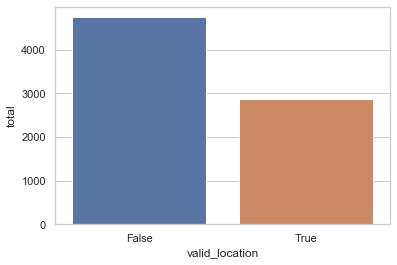

In [635]:
sns.set(style="whitegrid")
ax = sns.barplot(x="valid_location", y="total", data=tweets_valid_location)



In [637]:
locations = [len(location) > 2 for location in tweets.location_words]

tweets1 = tweets[locations]

tweets1[invalid_location_tweets].tail(100)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,id,keyword,location,location_words,text,veracity,length,valid_location
6658,9541,terrorist,Iraq|Afghanistan| RSA |Baghdad,"[Iraq|Afghanistan|, RSA, |Baghdad]",Don't say @ALIPAPER: women got problems this #...,0,124,False
6662,9550,threat,front row at a show,"[front, row, at, a, show]",WHITE AMERICANS ARE THE BIGGEST THREAT IN THE ...,0,80,False
6721,9629,thunderstorm,Oklahoma City OK,"[Oklahoma, City, OK]",Severe Thunderstorm Warnings have been cancell...,1,112,False
6731,9645,thunderstorm,Nicoma Park OK,"[Nicoma, Park, OK]",Severe Thunderstorm Warning including Midwest ...,1,118,False
6736,9653,thunderstorm,Killafornia made me,"[Killafornia, made, me]",9:35 pm. Thunderstorm. No rain. 90 degrees. Th...,1,63,False
...,...,...,...,...,...,...,...,...
7489,10711,wreck,Primum non nocere,"[Primum, non, nocere]",@GeorgeFoster72 and The Wreck of the Edmund Fi...,1,54,False
7545,10786,wrecked,Robin Hood's County,"[Robin, Hood's, County]",late night mcdonalds with friends = hilarious ...,0,129,False
7556,10802,wrecked,Click the link below okay,"[Click, the, link, below, okay]",The Twitter update pretty much wrecked the app,0,46,False
7558,10805,wrecked,probably not home,"[probably, not, home]",coleslaw #wrecked http://t.co/sijNBmCZIJ,0,40,False
